In [7]:
import numpy as np
from scipy.integrate import odeint
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib
from sympy import *
from IPython.core.display import SVG

In [9]:
L, C_1, C_2, R = symbols('L, C_1 C_2 R')
i_l, i, i_r, i_C1, i_C2 = symbols('i_l i i_r i_C1 i_C2')
U_C1, U_C2, U_L, U_N = symbols('U_C1 U_C2 U_L U_N')
P_B, m_0, m_1, g = symbols('P_B, m_0, m_1, g')
x_1, x_2, x_3 = symbols('x1 x2 x3')

In [4]:
SVG(filename='chuas_circuit.svg')

# Circuit equation

From $O_1$:

$U_L = U_{C2}$

Inductor Equation:

$U_L = -L\frac{di_l}{dt}$

So

$L \frac{di_l}{dt} = -U_{C2}$

From $O_2$:

$U_{C2} = iR + U_{C1}$

$i = \frac{U_{C2}-U_{C1}}{R}$

From capacitor equation:

$U = \frac{q}{C}$

$\frac{dU}{dt} = \frac{1}{C}\frac{dq}{dt} = \frac{i}{C}$

So:

$i_{C1} = C_1\frac{dU_{C1}}{dt}$

$i_{C2} = C_2\frac{dU_{C2}}{dt}$

From $W_1$:

$i_L = i + i_{C2}$

$i_L = \frac{U_{C2}-U_{C1}}{R} + C_2\frac{dU_{C2}}{dt}$

$C_2 \frac{d U_{C2}}{dt} = \frac{U_{C1}-U_{C2}}{R}+i_L$

Characteristic of N is:

$i_r = g(U_N)$

where

$g(u) = m_0u + \frac{1}{2}(m_1-m_0)(|u+B_p|-|u-B_p|)$

Form $O_3$:

$U_{C1} = U_N$

$i_r = g(U_{C1})$

From $W_2$:

$i = i_{C1}+i_r$

$\frac{U_{C2}-U_{C1}}{R} = C_1\frac{dU_{C1}}{dt}+g(U_{C1})$

$C_1\frac{dU_{C1}}{dt} = \frac{U_{C2}-U_{C1}}{R}-g(U_{C1})$

# Circuit difference equation

$L \frac{di_l}{dt} = -U_{C2}$

$C_2 \frac{d U_{C2}}{dt} = \frac{U_{C1}-U_{C2}}{R}+i_L$

$C_1\frac{dU_{C1}}{dt} = \frac{U_{C2}-U_{C1}}{R}-g(U_{C1})$

$x_1 = U_{C1} \qquad x_2 = U_{C2} \qquad x_3 = i_L$

$\dot{x_1} = -\frac{1}{C_1R}x_1 + \frac{1}{C_1 R}x_2 - \frac{1}{C_1}g(x_1)$

$\dot{x_2} = \frac{1}{C_2R}x_1 - \frac{1}{C_2R}x_2+\frac{1}{C_2}x_3$

$\dot{x_3} = -\frac{1}{L}x_2$

$\mathbf{x} = [x_1, x_2, x_3]$

# Equilibrium points

$\mathbf{\dot{x}} = 0$

So:

$0 = -\frac{1}{C_1R}x_1 + \frac{1}{C_1 R}x_2 - \frac{1}{C_1}g(x_1)$

$0 = \frac{1}{C_2R}x_1 - \frac{1}{C_2R}x_2+\frac{1}{C_2}x_3$

$0 = -\frac{1}{L}x_2$

From last equation:

$x_2 = 0$

So

$0 = \frac{1}{C_2R}x_1 + \frac{1}{C_2}x_3$

$x_3 = -\frac{1}{R}x_1$

First equation:

$0 = -\frac{1}{C_1R}x_1 - \frac{1}{C_1}g(x_1)$

$g(x_1) = -\frac{1}{R}x_1$

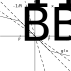

In [5]:
SVG(filename='equilibrium.svg')

Chart show $g(x_1)$ and $-\frac{1}{R}x_1$ for 3 differetn values of $R_1$.

For every $R_1$ $x_1=0$ is equlibrium.

When $m_0 = -\frac{1}{R1}$ all $x_1 \in [-P_B, P_B]$ are equilibrium points.

Third case is when $-\frac{1}{R1}$ intersecting $g(x)$ in $m_1$ part. In such case there are two equilibrium points.

TODO ind all eq points.

## 0 eqilibrium points

Linearisation for point $\mathbf{x}=0$:

In [16]:
J_0 = Matrix([[m_0/C_1-1/(C_1*R), 1/(C_1*R), 0], [1/(C_2*R), -1/(C_2*R), 1/C_2],[0, -1/L, 0]])
J_0

Matrix([
[m_0/C_1 - 1/(C_1*R),  1/(C_1*R),     0],
[          1/(C_2*R), -1/(C_2*R), 1/C_2],
[                  0,       -1/L,     0]])

Eigenvalues:

In [21]:
lamda = symbols('lamda')
J_0_p = J_0.charpoly(lamda)
J_0_p

PurePoly(lamda**3 + (C_1 - C_2*R*m_0 + C_2)/(C_1*C_2*R)*lamda**2 + (C_1*R - L*m_0)/(C_1*C_2*L*R)*lamda + (-R*m_0 + 1)/(C_1*C_2*L*R), lamda, domain='ZZ(C_1,C_2,L,R,m_0)')